In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
url = "http://roybatty.org/iris.csv"
iris = pd.read_csv(url)
iris.columns = iris.columns.str.replace('.',"_")

In [4]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
setosa = iris.query('Species == "setosa"')

In [6]:
setosa.shape

(50, 5)

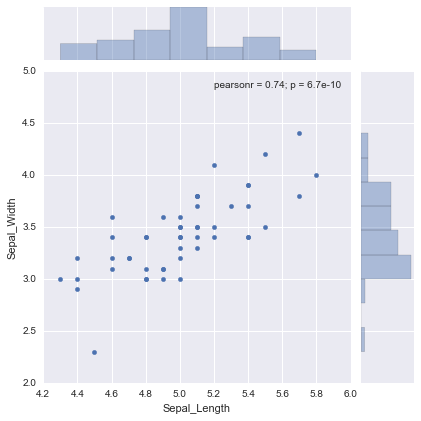

In [7]:
sbn.jointplot(setosa.Sepal_Length, setosa.Sepal_Width)
pass

# Linear Regression -- finding the line of "best fit"


What if we wanted to find a linear function of Sepal Length that best predicts Sepal Width? 

Linear functions are those whose graphs are straight lines. A linear function of a variable $x$ is usually written as: 

$$
f(x) = bx + a
$$

where $a$ and $b$ are constants.  In  geometric terms $b$ is the slope of the line and $a$ is the value of the function when $x$ is zero (usually the referred to as the "y-intercept").


Ther are infinitely many such linear functions of $x$ we could define. Which line should we use if we want to be able to predict $y$?



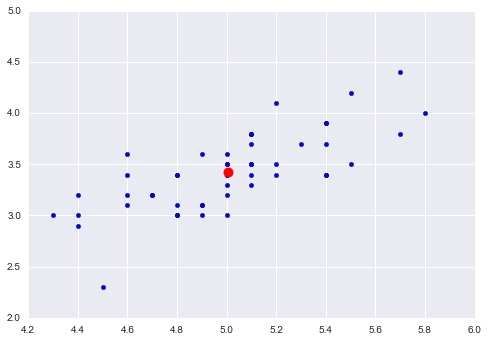

In [8]:
plt.scatter(setosa.Sepal_Length, setosa.Sepal_Width)
plt.plot([setosa.Sepal_Length.mean()], [setosa.Sepal_Width.mean()], 'ro', markersize=10)
pass

Find the linear function, $f(x)$, that minimizes

$$
\sum (y_i - f(x_i))^2
$$

i.e. find the line that minimizes the deviations from the line in the $y$ direction.

The slope, $b$, and intercept, $a$, that minimize this quantity are:

\begin{align}
b &= \frac{s_{xy}}{s^2_x}\\
\\
a &= \overline{y} - b\overline{x}
\end{align}



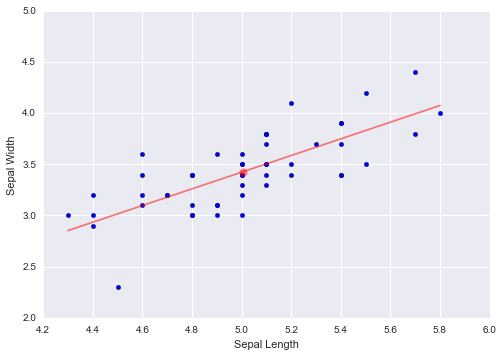

In [39]:
plt.scatter(setosa.Sepal_Length, setosa.Sepal_Width)
plt.plot([setosa.Sepal_Length.mean()], [setosa.Sepal_Width.mean()], 
         'ro', markersize=8, alpha=0.5)

# calculate regression
sxy = np.cov(setosa.Sepal_Length, setosa.Sepal_Width, ddof=1)[0,1]
sx2 = np.var(setosa.Sepal_Length)
b = sxy/sx2
a = np.mean(setosa.Sepal_Width) - b*np.mean(setosa.Sepal_Length)

# plot regression line
minx = min(setosa.Sepal_Length)
maxx = max(setosa.Sepal_Length)
yhatmin = b*minx + a
yhatmax = b*maxx + a

plt.plot((minx, maxx), (yhatmin, yhatmax), color='r', alpha=0.5)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
pass

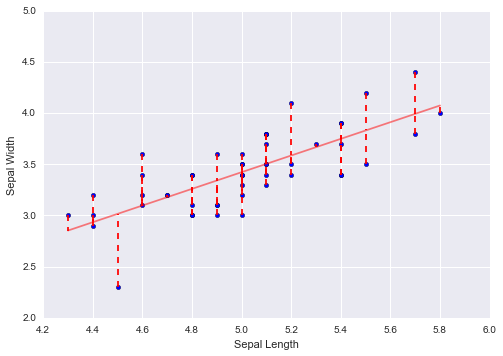

In [38]:
plt.scatter(setosa.Sepal_Length, setosa.Sepal_Width)


# calculate regression
sxy = np.cov(setosa.Sepal_Length, setosa.Sepal_Width, ddof=1)[0,1]
sx2 = np.var(setosa.Sepal_Length)
b = sxy/sx2
a = np.mean(setosa.Sepal_Width) - b*np.mean(setosa.Sepal_Length)

# plot regression line
minx = min(setosa.Sepal_Length)
maxx = max(setosa.Sepal_Length)
yhatmin = b*minx + a
yhatmax = b*maxx + a
plt.plot((minx, maxx), (yhatmin, yhatmax), color='r', alpha=0.5)

for (x,y) in zip(setosa.Sepal_Length, setosa.Sepal_Width):
    yhat = b*x + a
    plt.vlines(x, y, yhat, linestyle='dashed', color='r')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
pass

## Residuals

In [40]:
# yhat is the predicted values of y from x
yhat = b * setosa.Sepal_Length + a

# residuals are the differnce between predicted and actual
residuals = setosa.Sepal_Width - yhat

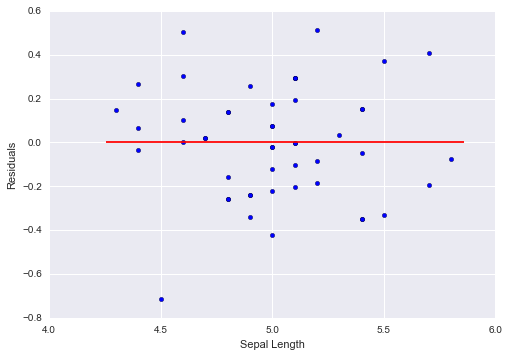

In [48]:
plt.scatter(setosa.Sepal_Length, residuals)
plt.hlines(0, min(setosa.Sepal_Length)*0.99, max(setosa.Sepal_Length)*1.01,color='r')
plt.xlabel("Sepal Length")
plt.ylabel("Residuals")